In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nnnn7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nnnn7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nnnn7\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nnnn7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
url = 'https://www.amazon.com/Stanlely-Quencher-FlowStateTM-Tumbler-Frost/dp/B0CK9GTLJY/ref=sr_1_5?crid=17T9FJDV4LG53&dib=eyJ2IjoiMSJ9.cRHmMD8dSA-FdPRhZgYfOyefeX_DIBxET797dvuK51XBAaCXs-iCY5tQSvacUm6evwk8om1FoCemb8msgoGNqngprDY6o_lcbpRIx7LeFPIUhhgLVIi1eKtwTcit4LCM4P0hc5IQy3e2vjIeqh3yC5nr1aIzUntIi7WKF1wrEvjg_CuvOwltDgXzQ7LaPCkTeczNlfutiJdGmea8NhyMRkiC5qQLOVcVTkeZaX0lKuIiZN6k7etrsjPL_XijKDQ8W4Lq_PAOg2cxTP-6lJKCv87Cba7S9obxs8m30Mif5B8.PWIAum7t_R2xG3SGzrd8WuqNn7uVAMJtwXlh-fCOXCM&dib_tag=se&keywords=stanley%2Bcup&qid=1722353487&sprefix=stan%2Caps%2C89&sr=8-5&th=1%2'

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)
driver.get(url)

soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

try:
    product_title = soup.find(id='productTitle').get_text(strip=True)
except AttributeError:
    product_title = None
    print("Could not find the product title.")

try:
    product_price = soup.find('span', {'class': 'a-price-whole'}).get_text(strip=True)
except AttributeError:
    product_price = None
    print("Could not find the product price.")

if product_title and product_price:
    data = {'Title': [product_title], 'Price': [product_price]}
    df = pd.DataFrame(data)
    print(df)
else:
    print("Failed to scrape the product data.")

    

                                               Title Price
0  Stanley Quencher H2.0 FlowState Stainless Stee...   45.


In [4]:
url = 'https://www.amazon.com/Stanlely-Quencher-FlowStateTM-Tumbler-Frost/product-reviews/B0CK9GTLJY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)
driver.get(url)

reviews = []
ratings = []
images = []

def extract_reviews(soup):
    review_blocks = soup.find_all('div', {'data-hook': 'review'})
    for review in review_blocks:
        review_text = review.find('span', {'data-hook': 'review-body'}).get_text(strip=True)
        reviews.append(review_text)
        
        rating = review.find('i', {'data-hook': 'review-star-rating'}).get_text(strip=True)
        ratings.append(rating)
        
        image_tag = review.find('img', {'data-hook': 'review-image-tile'})
        image_url = image_tag['src'] if image_tag else 'No image'
        images.append(image_url)
        

while len(reviews) < 100: 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2) 
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    extract_reviews(soup)

    if len(reviews) >= 100:
        break

    try:
        next_page_button = driver.find_element(By.XPATH, "//li[@class='a-last']/a")
        next_page_button.click()
        time.sleep(2)  
    except NoSuchElementException:
        break 

driver.quit()


print(f"Total number of reviews: {len(reviews)}")

df = pd.DataFrame({
    'Review': reviews,
    'Rating': ratings,
    'Image': images})
df.to_csv('amazon_reviews.csv', index=False)
df.head(10)

Total number of reviews: 100


,Review,Rating,Image
0,Easy to carry Handel and keeps drink cold. Not...,5.0 out of 5 stars,No image
1,"Well, y’all, I just have to gush about my new ...",5.0 out of 5 stars,https://m.media-amazon.com/images/I/61meSaEMUo...
2,I was on the fence for quite a while over whet...,5.0 out of 5 stars,No image
3,"I screamed so hard when this arrived, and let ...",5.0 out of 5 stars,https://m.media-amazon.com/images/I/619T3epBdo...
4,2 days ago I purchased a Stanley Cup and overa...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/61LyuO26sj...
5,My granddaughter revealed to me that she was t...,5.0 out of 5 stars,No image
6,I bought a Stanley because I needed a water bo...,4.0 out of 5 stars,https://m.media-amazon.com/images/I/61Qx6GEmt-...
7,The Stanley Quencher H2.0 FlowState Stainless ...,5.0 out of 5 stars,No image
8,"Alright, folks, buckle up because I'm about to...",5.0 out of 5 stars,No image
9,I have wanted a Stanley for a while but though...,5.0 out of 5 stars,No image


In [5]:
df.dropna(subset=['Review'], inplace=True)
df = df[df['Review'].str.strip().astype(bool)]

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)
    return text

df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

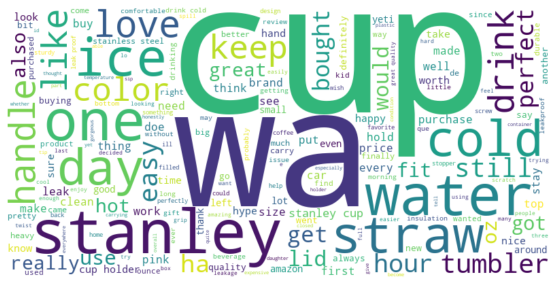

In [6]:
all_words = ' '.join(df['Cleaned_Review'])
stop_words = set(stopwords.words('english'))
custom_stopwords = {'youre', 'im', 'thats', 'hes', 'shes', 'ive', 'dont', 'didnt', 'doesnt', 'cant', 'couldnt', 'isnt', 'wasnt', 'wont', 'wouldnt','will','however'}
stop_words.update(custom_stopwords)

wordcloud = WordCloud(stopwords=stop_words,width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

positive    95
negative     4
neutral      1
Name: Sentiment_Category, dtype: int64


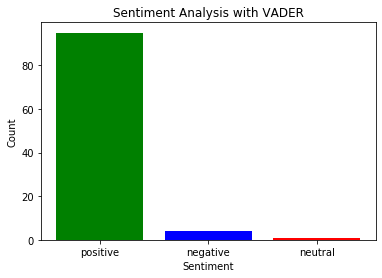

In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['Sentiment'] = df['Cleaned_Review'].apply(get_vader_sentiment)


def classify_vader_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(classify_vader_sentiment)


sentiment_counts = df['Sentiment_Category'].value_counts()
print(sentiment_counts)

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis with VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()